<a href="https://colab.research.google.com/github/Mritunjaysri01/Career-Launcher-ML-Intern/blob/master/Module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
warnings.filterwarnings('ignore')

In [14]:
bajaj=pd.read_csv('BAJAJELEC.csv')

In [15]:
daily_mean=np.mean(bajaj['Close Price'].pct_change())#daily returns
daily_std=np.std(bajaj['Close Price'].pct_change())
annual_mean= daily_mean * 252
annual_volatility=daily_std * np.sqrt(252)
print('\033[1m' + 'The Daily mean value is ' + '\033[0m' + str(daily_mean))
print('\033[1m' + 'The Daily standard deviation is ' + '\033[0m' + str(daily_std) + '\n')
print('\033[1m' + 'The Mean expected annual return is ' + '\033[0m' + str(annual_mean))
print('\033[1m' + 'The annual volatility is  ' + '\033[0m' + str(annual_volatility))

The Daily mean value is 0.0012541792961627196
The Daily standard deviation is 0.025323948340995717

The Mean expected annual return is 0.31605318263300536
The annual volatility is  0.4020052171471283


query 5.2

In [16]:
itdc=pd.read_csv('ITDC.csv') 
pvr=pd.read_csv('PVR.csv')
RCOM=pd.read_csv('RCOM.csv')
NCC=pd.read_csv('NCC.csv')
idfc=pd.read_csv('IDFC.csv')

In [17]:
df=pd.DataFrame()
df['itdc']=itdc['Close Price']
df['pvr']=pvr['Close Price']
df['NCC']=NCC['Close Price']
df['idfc']=idfc['Close Price']
df['RCOM']=itdc['Close Price']

In [18]:
returns=df.pct_change()

In [19]:
daily_mean=returns.mean()
cov=returns.cov()

In [20]:
weights=[0.2,0.2,0.2,0.2,0.2]

In [22]:
annual_return=np.sum(daily_mean * weights) * 252
annual_volatility=np.dot(np.transpose(weights),np.dot(cov,weights)) * np.sqrt(252)
print('\033[1m' + 'The Annual return of portfolio is ' + '\033[0m' + str(annual_return))
print('\033[1m' + 'The annual volatility of portfolio is  ' + '\033[0m' + str(annual_volatility))




The Annual return of portfolio is -0.15071755979918625
The annual volatility of portfolio is  0.004818377457491268


query 5.3


In [23]:
num_iteration=20000
values = np.zeros((8,num_iteration)) # to store the values of annual return and volatility for different weights
for i in range(num_iteration):
    weights=np.random.random(5)
    weights/=np.sum(weights)
    annual_return=np.sum(daily_mean * weights) * 252
    annual_volatility=np.dot(np.transpose(weights),np.dot(cov,weights)) * np.sqrt(252)
    
    values[0,i]=annual_return
    values[1,i]=annual_volatility
    values[2,i]=annual_return/annual_volatility
    for j in range(len(weights)):
        values[j+3,i]=weights[j]

In [24]:
df2=pd.DataFrame(np.transpose(values),columns=['return','STD','Sharpe Ratio','itdc','pvr','NCC','idfc','RCOM'])

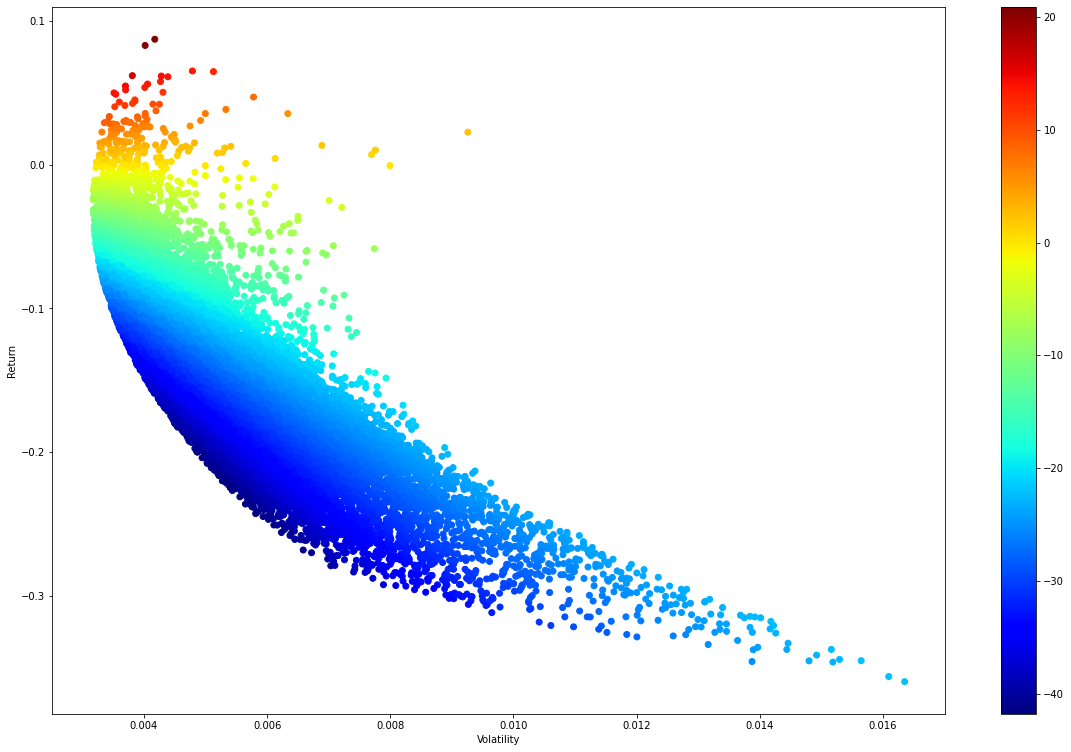

In [25]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(df2['STD'],df2['return'],c=df2['Sharpe Ratio'],cmap='jet')
plt.colorbar()

Query 5.4


In [27]:
max_sharpe=df2.iloc[df2['Sharpe Ratio'].idxmax()] # Finding the row of highest sharpe and lowest volatility
min_volatility=df2.iloc[df2['STD'].idxmin()]

In [28]:
print(max_sharpe)

return           0.087183
STD              0.004176
Sharpe Ratio    20.879584
itdc             0.009413
pvr              0.764910
NCC              0.199406
idfc             0.011640
RCOM             0.014632
Name: 2671, dtype: float64


In [29]:
print(min_volatility)

return         -0.024249
STD             0.003172
Sharpe Ratio   -7.643869
itdc            0.029092
pvr             0.397004
NCC             0.249245
idfc            0.261153
RCOM            0.063506
Name: 3382, dtype: float64


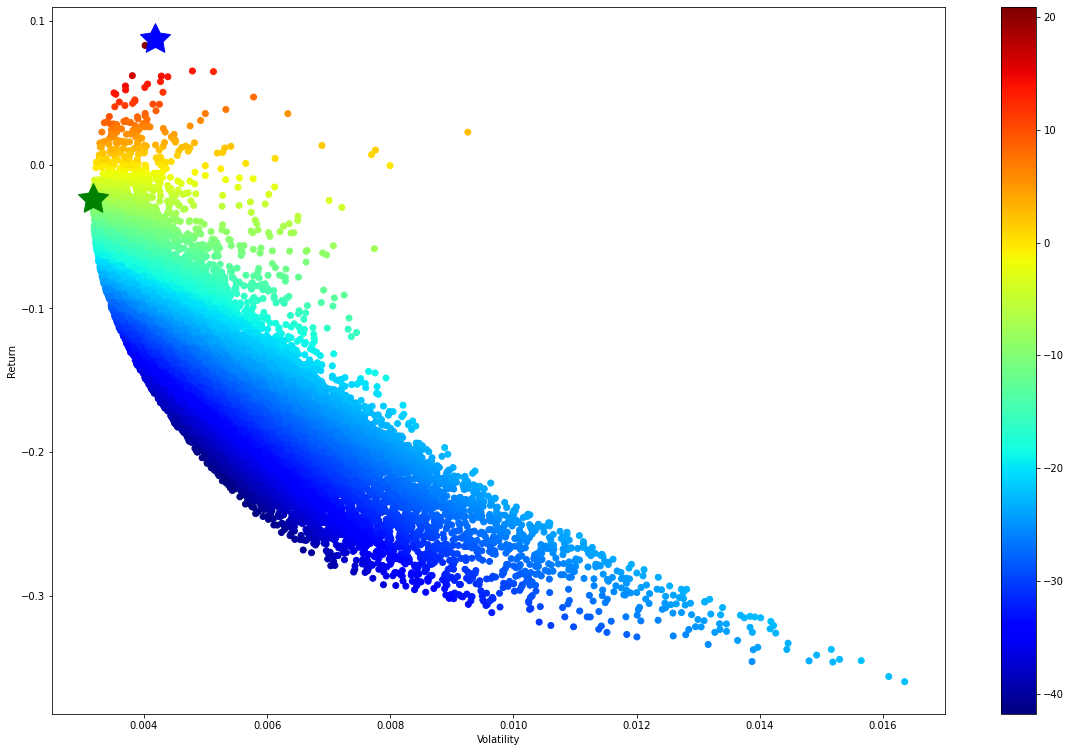

In [30]:
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(df2['STD'],df2['return'],c=df2['Sharpe Ratio'],cmap='jet')
plt.colorbar()
plt.scatter(max_sharpe[1],max_sharpe[0],marker=(5,1,0),color='b',s=1000)# Blue Star = maximum Sharpe Retio
plt.scatter(min_volatility[1],min_volatility[0],marker=(5,1,0),color='g',s=1000) # Green star=minimum variance